<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

import plotly.express as px

In [ ]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = ''
USER = ''
PASSWORD = ''
HOST = ''
PORT = 0000

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''
select * 
from public.vacancies 
'''

In [5]:
# результат запроса
vacancies = pd.read_sql_query(query_3_1, connection)
result_3_1 = vacancies.shape[0]
result_3_1

/tmp/ipykernel_55914/1762551502.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies = pd.read_sql_query(query_3_1, connection)


49197

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''
select * 
from public.employers 
'''

In [7]:
# результат запроса
employers = pd.read_sql_query(query_3_2, connection)
result_3_2 = employers.shape[0]
result_3_2

/tmp/ipykernel_55914/1591851949.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers = pd.read_sql_query(query_3_2, connection)


23501

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3 = f'''
select *
from public.areas 
'''

In [9]:
# результат запроса
areas = pd.read_sql_query(query_3_3, connection)
result_3_3 = areas.shape[0]
result_3_3

/tmp/ipykernel_55914/683918735.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  areas = pd.read_sql_query(query_3_3, connection)


1362

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query_3_4 = f'''
select *
from public.industries 
'''

In [11]:
# результат запроса
industries = pd.read_sql_query(query_3_4, connection)
result_3_4 = industries.shape[0]
result_3_4

/tmp/ipykernel_55914/2120729724.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  industries = pd.read_sql_query(query_3_4, connection)


294

***

Итак, мы имеем 49197 вакансий (result_3_1) от 23501 работодателей (result_3_2) в 1362 регионах (result_3_3) и в 294 сферах деятельности (result_3_4)

На основе предоставленных данных можно сделать следующие выводы:

* Средняя загрузка работодателей:
    - Среднее количество вакансий на одного работодателя: 49197/23501​≈2.09. Это указывает, что большинство работодателей публикуют одну-две вакансии, но могут быть крупные работодатели с большим числом вакансий.

* Региональная плотность вакансий:
    - Среднее количество вакансий на один регион: 49197/1362​≈36.1. Это может говорить о значительном неравенстве — в некоторых регионах вакансий значительно больше.

* Распределение вакансий по сферам деятельности:
    - Среднее количество вакансий на одну сферу деятельности: 49197/294​≈167.3. Здесь также могут быть дисбалансы между популярными и менее популярными отраслями.

* Неравенство в регионах и отраслях:
    - Есть вероятность, что большая часть вакансий сосредоточена в нескольких ключевых регионах и отраслях (например, IT, финансы, строительство), что может указывать на региональные и отраслевые диспропорции в доступности работы.

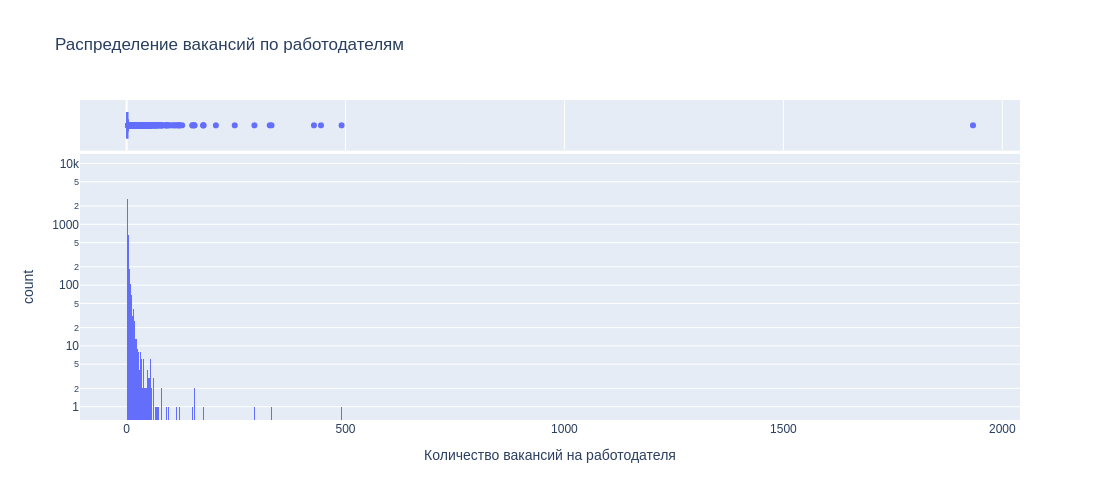

In [12]:
# выводы по предварительному анализу данных

# Распределение вакансий по работодателям
vacancies_per_employer = vacancies.groupby('employer_id').size()
distribution_df = pd.DataFrame({
    'Количество вакансий': vacancies_per_employer
})

fig = px.histogram(
    distribution_df,
    x='Количество вакансий',
    title="Распределение вакансий по работодателям",
    labels={'Количество вакансий': 'Количество вакансий на работодателя'},
    marginal="box",  # Добавление боксплота для дополнительного анализа
    width=1100, 
    height=500,
)
fig.update_layout(
    yaxis_type="log"  # Логарифмическая шкала для оси Y
)
fig.show("png")

In [13]:
#fig.write_html('plotly/Распределение вакансий по работодателям.html')

Как видим, есть 1 очень крупный работодатель, у которого 1933 вакансии, по 1 вакансии у 8699 работодателей, по 2 вакансии у 2575 работодателей, также есть чуть больше десятка крупных работодателей с более чем 100 вакансиями, в основном же единицы работодателей публикуют более 5 вакансий

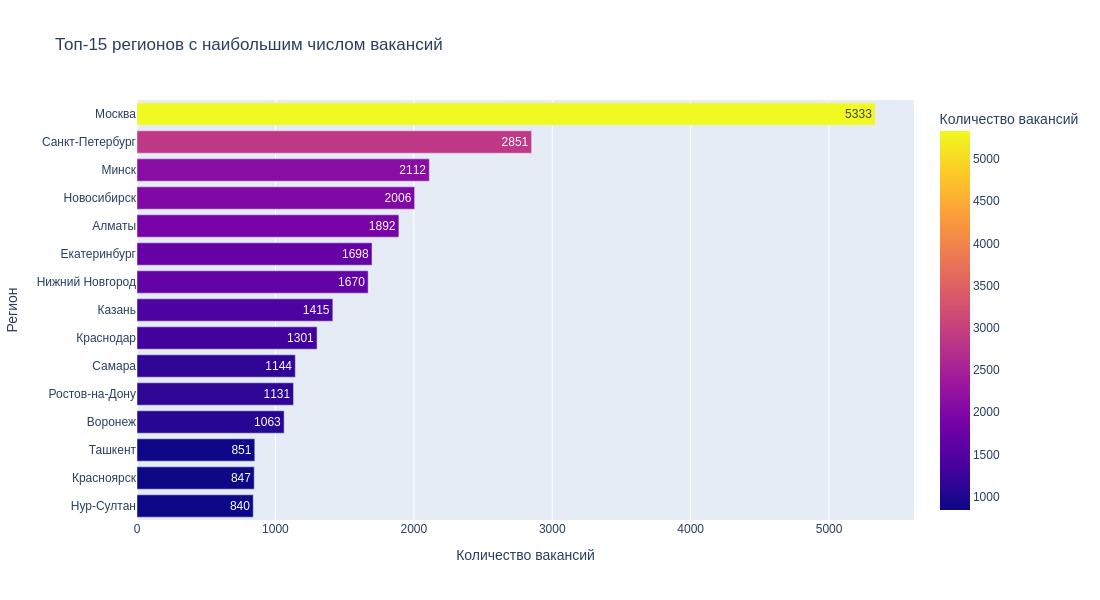

In [14]:
# Топ-15 регионов с наибольшим числом вакансий
vacancies_with_area = vacancies.merge(areas[['id', 'name']], how='left', left_on='area_id', right_on='id')
# Переименование столбцов для различения
vacancies_with_area.rename(columns={'name_x': 'vacancy_name', 'name_y': 'area_name'}, inplace=True)

top_regions = vacancies_with_area['area_name'].value_counts().head(15)
top_regions_df = top_regions.reset_index()
top_regions_df.columns = ['Регион', 'Количество вакансий']

fig = px.bar(
    top_regions_df,
    x='Количество вакансий',
    y='Регион',
    orientation='h',  # Горизонтальная ориентация
    title="Топ-15 регионов с наибольшим числом вакансий",
    labels={'Регион': 'Регион', 'Количество вакансий': 'Количество вакансий'},
    color='Количество вакансий',  # Цветовая шкала по числу вакансий
    width=1100, 
    height=600,
    text = 'Количество вакансий'
)

# Настройка внешнего вида
fig.update_layout(
    yaxis=dict(autorange="reversed")  # Реверс оси Y для сортировки сверху вниз
)

fig.show('png')

In [15]:
#fig.write_html('plotly/Топ-15 регионов с наибольшим числом вакансий.html')

Как видим, из 1362 регионов в топ-15 около половины всех вакансий. Больше всего вакансий в Москве. Также видим, что представлены города не только России, но и Казахстана, Беларуси, Узбекистана.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [16]:
# текст запроса
query_4_1 = f'''
select 
    a.name area,
    count(v.id) cnt
from public.vacancies v
    join public.areas a on v.area_id = a.id
group by a.id
order by cnt desc
'''

In [17]:
# результат запроса
result_4_1 = pd.read_sql_query(query_4_1, connection)
result_4_1.head(5)

/tmp/ipykernel_55914/1520968062.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [18]:
# текст запроса
query_4_2 = f'''
select 
    count(id) cnt
from public.vacancies 
where salary_from is not null
    or salary_to is not null
'''

In [19]:
# результат запроса
result_4_2 = pd.read_sql_query(query_4_2, connection)
result_4_2

/tmp/ipykernel_55914/682357497.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [20]:
# текст запроса
query_4_3 = f'''
select 
    round(avg(salary_from)) average_from,
    round(avg(salary_to)) average_to
from public.vacancies 
'''

In [21]:
# результат запроса
result_4_3 = pd.read_sql_query(query_4_3, connection)
result_4_3

/tmp/ipykernel_55914/2925693122.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,average_from,average_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [22]:
# текст запроса
query_4_4 = f'''
select 
    schedule,
    employment, 
    count(*) vacancy_count
from public.vacancies 
group by schedule, employment
order by vacancy_count desc
'''

In [23]:
# результат запроса
result_4_4 = pd.read_sql_query(query_4_4, connection)
result_4_4

/tmp/ipykernel_55914/1026875899.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,schedule,employment,vacancy_count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [24]:
# текст запроса
query_4_5 = f'''
select 
    experience
from public.vacancies 
group by experience
order by count(*) 
'''

In [25]:
# результат запроса
result_4_5 = pd.read_sql_query(query_4_5, connection)
result_4_5

/tmp/ipykernel_55914/2394051025.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experience
0,Более 6 лет
1,Нет опыта
2,От 3 до 6 лет
3,От 1 года до 3 лет


***

Детальный анализ вакансий

📌 Распределение вакансий по городам:

    Вакансии распределены неравномерно — подавляющее большинство сосредоточено в крупных городах, тогда как в небольших населённых пунктах их крайне мало.

📌 Форматы работы и занятость:

    Большая часть работодателей ищет сотрудников на полную занятость и полный рабочий день.
    Удалённая работа и гибкий график встречаются всё чаще, что может быть связано с трендом на гибкие условия труда.
    Проектные работы и стажировки значительно реже, что может говорить о меньшей популярности или востребованности.

📌 Заработная плата:

    Средний уровень зарплат составляет от 71 000 до 110 000 рублей, но это среднее значение, а не медиана.
    Возможны искажения из-за наличия очень высоких зарплат в узких специальностях.
    Из 49197 вакансий хотя бы одно поле заполнено у 24073, то есть более половины работодателей не указывают уровень зарплаты. 


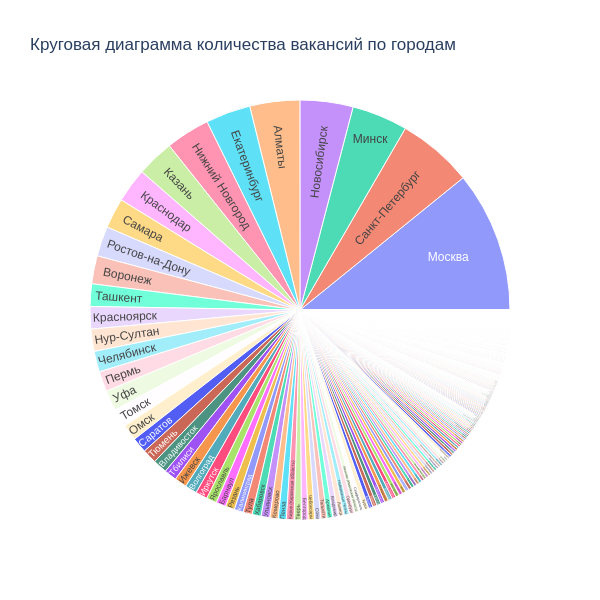

In [26]:
# выводы по детальному анализу вакансий
fig = px.sunburst(
    result_4_1, 
    path=['area'], 
    values='cnt', 
    height=600, #высота
    width=600, #ширина
    title="Круговая диаграмма количества вакансий по городам",
    )
fig.show('png') 

In [27]:
#fig.write_html('plotly/Круговая диаграмма количества вакансий по городам.html')

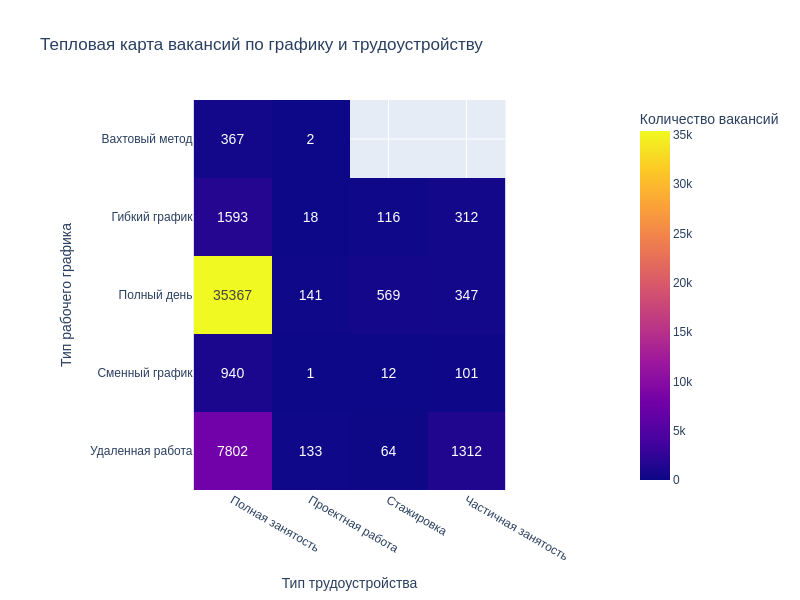

In [28]:
# Создание сводной таблицы для матрицы
pivot_df = result_4_4.pivot_table(values='vacancy_count', index='schedule', columns='employment', aggfunc='sum')

# Построение тепловой карты
fig = px.imshow(pivot_df, 
                labels={'x': 'Тип трудоустройства', 'y': 'Тип рабочего графика', 'color': 'Количество вакансий'},
                title="Тепловая карта вакансий по графику и трудоустройству",
                height=600, width=800, )

fig.update_traces(texttemplate="%{z:.0f}", textfont_size=14)

fig.show('png')

In [29]:
#fig.write_html('plotly/Тепловая карта вакансий по графику и трудоустройству.html')

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [30]:
# текст запроса
query_5_1 = f'''
with employer_vacancies as (
    select 
        e.name employer_name
    from public.vacancies v
        join public.employers e on v.employer_id=e.id
    group by employer_name
    order by count(*) desc
)
(select 
    employer_name
from employer_vacancies
limit 1)
union all
( select 
    employer_name
from employer_vacancies
limit 1 offset 4)
'''


In [31]:
# результат запроса
result_5_1 = pd.read_sql_query(query_5_1, connection)
result_5_1

/tmp/ipykernel_55914/681737903.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,employer_name
0,Яндекс
1,Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [32]:
# текст запроса
query_5_2 = f'''
select
    a.name area,
    count(e.id) cnt_employers,
    count(v.id) cnt_vacancies
from public.areas a
    left join public.employers e on a.id=e.area
    left join public.vacancies v on a.id=v.area_id
group by a.name
order by cnt_vacancies nulls first, cnt_employers desc
'''

In [33]:
# результат запроса
result_5_2 = pd.read_sql_query(query_5_2, connection)
result_5_2.head(1)

/tmp/ipykernel_55914/1246303688.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,area,cnt_employers,cnt_vacancies
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [34]:
# текст запроса
query_5_3 = f'''
select
    e.name employer_name,
    count(distinct v.area_id) cnt_areas
from public.employers e
    left join public.vacancies v on e.id=v.employer_id
group by e.name
order by cnt_areas desc
'''

In [35]:
# результат запроса
result_5_3 = pd.read_sql_query(query_5_3, connection)
result_5_3

/tmp/ipykernel_55914/12575971.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,employer_name,cnt_areas
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23170,СДЕЛКА,0
23171,Alandr Group,0
23172,СДК,0
23173,Lemon Land Lombard,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [36]:
# текст запроса
query_5_4 = f'''
select
    count(*) 
from public.employers e 
    left join public.employers_industries ei on e.id=ei.employer_id
where ei.industry_id is null
'''

In [37]:
# результат запроса
result_5_4 = pd.read_sql_query(query_5_4, connection)
result_5_4

/tmp/ipykernel_55914/2100614959.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [38]:
# текст запроса
query_5_5 = f'''
select
    e.name,
    count(ei.industry_id) cnt_industries
from public.employers e 
    left join public.employers_industries ei on e.id=ei.employer_id
group by e.name
having count(ei.industry_id) = 4
order by e.name
limit 1 offset 2
'''

In [39]:
# результат запроса
result_5_5 = pd.read_sql_query(query_5_5, connection)
result_5_5

/tmp/ipykernel_55914/3968243757.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,cnt_industries
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [40]:
# текст запроса
query_5_6 = f'''
select
    count(*) 
from public.employers e 
    left join public.employers_industries ei on e.id=ei.employer_id
    left join public.industries i on ei.industry_id=i.id
where i.name like 'Разработка программного обеспечения'
'''

In [41]:
# результат запроса
result_5_6 = pd.read_sql_query(query_5_6, connection)
result_5_6

/tmp/ipykernel_55914/2006184108.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [42]:
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup

# URL страницы с таблицей
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'

# Загружаем страницу
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Находим таблицу с городами-миллионерами
table = soup.find('table', {'class': 'standard sortable'})

# Список для хранения данных
cities = []

# Обходим строки таблицы (пропуская заголовок)
for row in table.find_all('tr')[1:]:
    columns = row.find_all('td')
    if columns:
        city_name = columns[1].text.strip()  # Название города
        #population = columns[2].text.strip()  # Численность населения
        cities.append((city_name))

#df = pd.DataFrame(cities, columns=['Город', 'Население'])

print(cities)


['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [43]:
# текст запроса
query_5_7 = '''
with yandex_stats as (select
    a.name,
    count(v.id) cnt_vacancies
from public.vacancies v
    left join public.employers e on e.id=v.employer_id
    left join public.areas a on a.id=v.area_id
where e.name like 'Яндекс' 
    and a.name in ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 
    'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара', 
    'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград')
group by a.name
order by cnt_vacancies)
(select 
    name,
    cnt_vacancies
from yandex_stats)
union all
(select
    'Total',
    sum(cnt_vacancies)
from yandex_stats)
'''

In [44]:
# результат запроса
result_5_7 = pd.read_sql_query(query_5_7, connection)
print(result_5_7.shape[0])
result_5_7

17


/tmp/ipykernel_55914/3370616399.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,cnt_vacancies
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Уфа,26.0
8,Самара,26.0
9,Краснодар,30.0


***

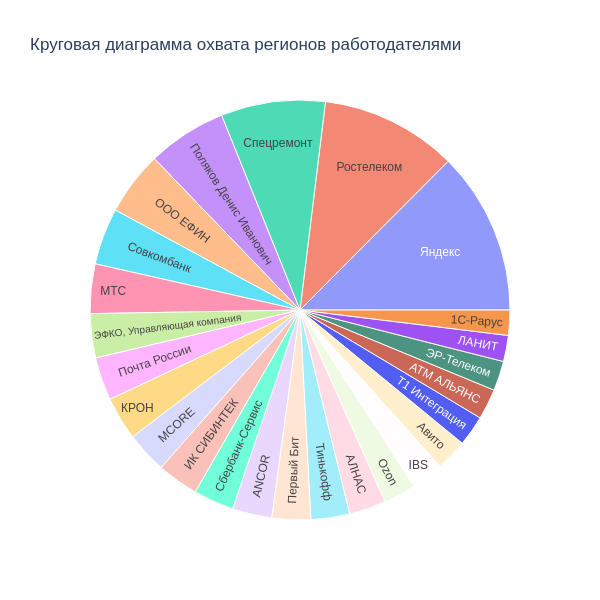

In [45]:
# выводы по анализу работодателей
fig = px.sunburst(
    result_5_3.head(25), 
    path=['employer_name'], 
    values='cnt_areas', 
    height=600, #высота
    width=600, #ширина
    title="Круговая диаграмма oхвата регионов работодателями",
    )
fig.show('png') 

In [46]:
#fig.write_html('plotly/Круговая диаграмма oхвата регионов работодателями.html')

Подведем итоги:

Всего 23501 работодателей. 

* На первом месте по количеству вакансий Яндекс, на пятом Газпром нефть.
    - Это говорит о высокой активности Яндекса на рынке труда, особенно в IT-сфере. Газпром нефть тоже активно нанимает, но, вероятно, в узкоспециализированных областях. 

* Есть 410 работодателей, у которых указан регион Россия и при этом 0 вакансий.
    - Возможно, это неактивные компании, недавно зарегистрированные организации или технические аккаунты.

* У 8419 не указана сфера деятельности.
    - Это может указывать на неполноту данных или на компании с разнопрофильной деятельностью.

* На 3м месте в алфавитном списке компаний с 4 сферами деяиельности 2ГИС.
    - Это подтверждает её многопрофильность (разработка карт, справочников, рекламы и т. д.).

* У 3553 компаний в качестве сферы деятельности указана Разработка программного обеспечения, что делает IT ключевым рынком труда.
    - IT-сфера — один из ключевых рынков труда. Возможно, многие из них — стартапы или аутсорсинговые компании.

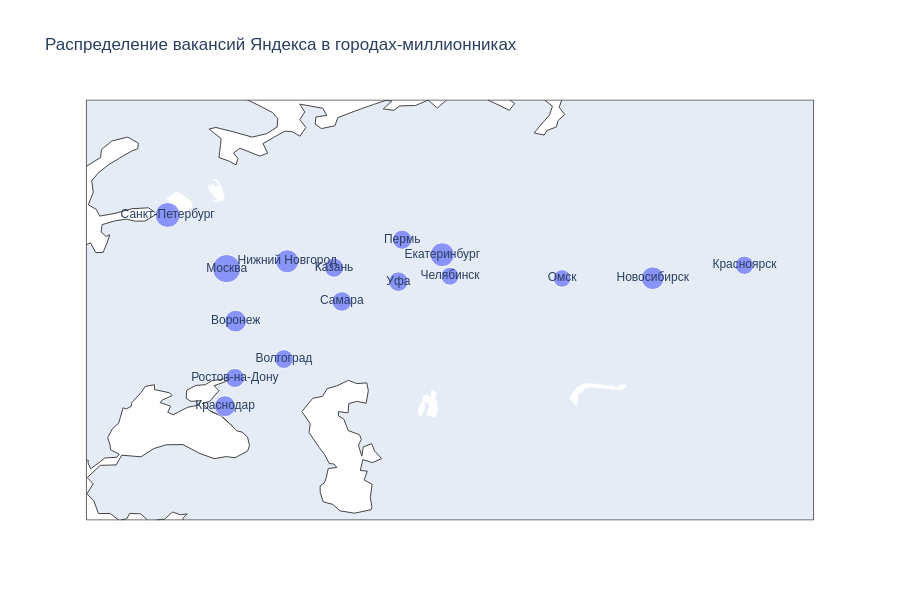

In [47]:
# поскольку координаты нужных городов просто найти с помощью запроса к любому ии-помощнику, не буду их парсить, а сразу добавлю

# Добавление координат городов
coordinates = {
    'Москва': (55.7558, 37.6176),
    'Санкт-Петербург': (59.9343, 30.3351),
    'Новосибирск': (55.0084, 82.9357),
    'Екатеринбург': (56.8389, 60.6057),
    'Казань': (55.8304, 49.0661),
    'Красноярск': (56.0153, 92.8932),
    'Нижний Новгород': (56.3269, 44.0059),
    'Челябинск': (55.1644, 61.4368),
    'Уфа': (54.7388, 55.9721),
    'Самара': (53.1959, 50.1008),
    'Ростов-на-Дону': (47.2357, 39.7015),
    'Краснодар': (45.0355, 38.9753),
    'Омск': (54.9885, 73.3242),
    'Воронеж': (51.6615, 39.2003),
    'Пермь': (58.0105, 56.2502),
    'Волгоград': (48.7080, 44.5133)
}
df_yandex = result_5_7.head(16).copy()
df_yandex['lat'] = df_yandex['name'].apply(lambda x: coordinates[x][0])
df_yandex['lon'] = df_yandex['name'].apply(lambda x: coordinates[x][1])

# Создание карты
fig = px.scatter_geo(df_yandex,
                     lat='lat',
                     lon='lon',
                     text='name',
                     size='cnt_vacancies',
                     title='Распределение вакансий Яндекса в городах-миллионниках',
                     projection='kavrayskiy7',
                     height=600, width=900,)

# Настройка отображения карты
fig.update_geos(fitbounds="geojson")

fig.show('png')

In [48]:
#fig.write_html('plotly/Распределение вакансий Яндекса в городах-миллионниках.html')

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [49]:
# текст запроса
query_6_1 = '''
select
    count(*)
from public.vacancies
where lower(name) like '%data%'
    or lower(name) like '%данн%'
'''

In [50]:
# результат запроса
result_6_1 = pd.read_sql_query(query_6_1, connection)
result_6_1

/tmp/ipykernel_55914/110680103.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [51]:
# текст запроса
query_6_2 = '''
select
    count(*)
from public.vacancies
where ((name ilike '%data scientist%') or (name ilike '%data science%')
    or (name ilike '%исследователь данных%')
    or (name ilike '%ML%' and name not ilike '%HTML%')
    or (name ilike '%machine learning%')
    or (name ilike '%машинн%обучен%'))
    and (name ilike '%junior%' or (experience = 'Нет опыта') or (employment = 'Стажировка'))
'''

In [52]:
# результат запроса
result_6_2 = pd.read_sql_query(query_6_2, connection)
result_6_2

/tmp/ipykernel_55914/2753634649.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [53]:
# текст запроса
query_6_3 = '''
select 
     count(*)

from vacancies v

WHERE ( (v.key_skills like '%SQL%')
        or
        (v.key_skills ilike '%postgres%')
        )
    AND
(
    (name ILIKE '%data scientist%') OR (name ILIKE '%data science%') OR (name ILIKE '%исследователь данных%')
    OR ((name ILIKE '%ML%') AND (name NOT ILIKE '%HTML%'))
    OR (name ILIKE '%machine learning%')
    OR (name ILIKE '%машинн%обучен%')
    AND (key_skills IS NOT NULL)
)
'''

In [54]:
# результат запроса
result_6_3 = pd.read_sql_query(query_6_3, connection)
result_6_3

/tmp/ipykernel_55914/4098921489.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [55]:
# текст запроса
query_6_4 = '''
SELECT 
     count(*)

FROM vacancies v

WHERE (v.key_skills ilike '%Python%')
    AND
(
    (name ILIKE '%data scientist%') OR (name ILIKE '%data science%') OR (name ILIKE '%исследователь данных%')
    OR ((name ILIKE '%ML%') AND (name NOT ILIKE '%HTML%'))
    OR (name ILIKE '%machine learning%')
    OR (name ILIKE '%машинн%обучен%')
    AND (key_skills IS NOT NULL)
)
'''

In [56]:
# результат запроса
result_6_4 = pd.read_sql_query(query_6_4, connection)
result_6_4

/tmp/ipykernel_55914/3633921962.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [57]:
# текст запроса
query_6_5 = '''
SELECT 
     ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, E'\\t', '')) + 1), 2) AS avg_skills

FROM vacancies v

WHERE 
(
    (name ILIKE '%data scientist%') OR (name ILIKE '%data science%') OR (name ILIKE '%исследователь данных%')
    OR ((name LIKE '%ML%') AND (name NOT ILIKE '%HTML%'))
    OR (name ILIKE '%machine learning%')
    OR (name ILIKE '%машинн%обучен%')
    AND (key_skills IS NOT NULL)
)
'''

In [58]:
# результат запроса
result_6_5 = pd.read_sql_query(query_6_5, connection)
result_6_5

/tmp/ipykernel_55914/2976042599.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,avg_skills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [59]:
# текст запроса
query_6_6 = '''
SELECT 
    experience,
    ROUND(AVG(
        (COALESCE(salary_from, salary_to) + COALESCE(salary_to, salary_from)) / 2
    )) AS avg_salary
FROM vacancies 
WHERE 
(
    (name ILIKE '%data scientist%') OR (name ILIKE '%data science%') OR (name ILIKE '%исследователь данных%')
    OR ((name LIKE '%ML%') AND (name NOT ILIKE '%HTML%'))
    OR (name ILIKE '%machine learning%')
    OR (name ILIKE '%машинн%обучен%')
)
AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
GROUP BY experience
'''

In [60]:
# результат запроса
result_6_6 = pd.read_sql_query(query_6_6, connection)
result_6_6

/tmp/ipykernel_55914/4066043572.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

Выводы по предметному анализу вакансий Data Science:

📌 Общее количество вакансий, связанных с данными:
        
    Всего 1771 вакансий, содержащих в названии "data" или "данн", что показывает высокий спрос на специалистов, работающих с данными.

📌 Вакансии для Junior Data Scientist:
    
    Только 51 вакансия ориентирована на начинающих специалистов (junior, нет опыта или стажировка), что говорит о том, что стартовые позиции в этой сфере встречаются редко.

📌 Важность SQL и Python в вакансиях DS:
        
    229 вакансий требуют SQL/PostgreSQL, что подтверждает, что навыки работы с базами данных важны.
    357 вакансий требуют Python, что делает его самым востребованным языком программирования для DS.

📌 Ключевые навыки:
    
    В среднем в вакансиях указывают 6.41 ключевых навыков, что говорит о высокой многогранности профессии.


📌 Связь зарплаты и опыта:

    Зарплата растёт вместе с опытом:
        Нет опыта → 74 643 ₽
        1-3 года → 139 675 ₽
        3-6 лет → 243 115 ₽
        Данные по уровню 6+ лет отсутствуют, вероятно, обсуждаются индивидуально.

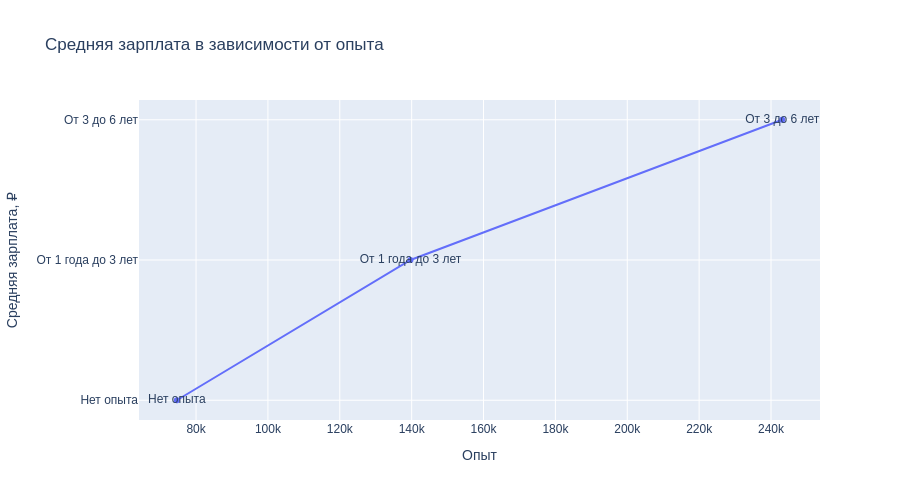

In [61]:
# выводы по предметному анализу
fig = px.line(x=result_6_6['avg_salary'], y=result_6_6['experience'], text=result_6_6['experience'], 
               markers=True, title="Средняя зарплата в зависимости от опыта",
               labels={'x': 'Опыт', 'y': 'Средняя зарплата, ₽'},
               height=500, width=900,)
fig.show('png')

In [62]:
#fig.write_html('plotly/Средняя зарплата в зависимости от опыта.html')

# Общий вывод по проекту

Итог исследования и дальнейшие шаги

📌 Основные выводы:

- Рынок труда сконцентрирован в крупных городах и ключевых отраслях.
- Начинающим специалистам в Data Science сложно найти работу, так как вакансий для Junior мало.
- Python и SQL — обязательные навыки для DS.
- Зарплаты растут с опытом, но нет данных по уровню 6+ лет.
- Гибкие условия труда набирают популярность, но полная занятость всё ещё доминирует.
- Некоторые компании имеют нулевые вакансии, что может указывать на неактивность или ошибки в данных.

📌 Дальнейшее исследование может включать:

- Прогнозирование трендов по зарплатам и спросу на DS-специалистов.
- Глубокий анализ вакансий с гибким графиком (в каких сферах чаще встречается).
- Исследование рынка труда по регионам для выявления дефицитных и перенасыщенных рынков.

Этот анализ показывает текущие тренды рынка труда в области Data Science и в целом.
Возможные дальнейшие шаги включают прогнозирование, анализ региональных различий и исследования востребованных навыков в динамике. 🚀

In [63]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

# посмотрю, в каких сферах сосредоточены вакансии дата саентиста и в каком количестве, а также какая средняя зарплата по сферам

query_01 = '''
SELECT 
    COALESCE(i.name, 'Не указано') AS industry_name,
    ROUND(AVG(
        (COALESCE(v.salary_from, v.salary_to) + COALESCE(v.salary_to, v.salary_from)) / 2
    )) AS avg_salary,
    COUNT(v.id) AS count_vacancies,
    COUNT(DISTINCT a.id) AS count_areas,
    COUNT(DISTINCT e.id) AS count_employers
FROM vacancies v
LEFT JOIN employers e ON v.employer_id = e.id
LEFT JOIN employers_industries ei ON ei.employer_id = e.id
LEFT JOIN industries i ON ei.industry_id = i.id
LEFT JOIN areas a ON a.id = v.area_id
WHERE 
(
    v.name ILIKE '%data%' 
    OR v.name ILIKE '%scientist%'
    OR v.name ILIKE '%machine%'
    OR v.name ILIKE '%learning%'
    OR v.name ILIKE '%ML%' AND v.name NOT ILIKE '%HTML%'
    OR (v.name ILIKE '%данны%')
    OR (v.name ILIKE '%машинн%обучен%')
)
AND (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
GROUP BY industry_name
ORDER BY avg_salary DESC;
'''


In [64]:
result_01 = pd.read_sql_query(query_01, connection)
result_01

/tmp/ipykernel_55914/2607299708.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,industry_name,avg_salary,count_vacancies,count_areas,count_employers
0,Игорный бизнес,300000.0,1,1,1
1,"Бытовая техника, электроника, климатическое об...",300000.0,1,1,1
2,Лизинговые компании,300000.0,1,1,1
3,"Безалкогольные напитки (продвижение, оптовая т...",300000.0,1,1,1
4,"Алкогольные напитки (продвижение, оптовая торг...",300000.0,1,1,1
...,...,...,...,...,...
114,"Черная металлургия (производство чугуна, стали...",30000.0,1,1,1
115,"Ювелирные изделия, бижутерия (производство)",30000.0,1,1,1
116,"Чай, кофе (продвижение, оптовая торговля)",25168.0,2,2,2
117,"Корма для животных (продвижение, оптовая торго...",24233.0,2,2,2


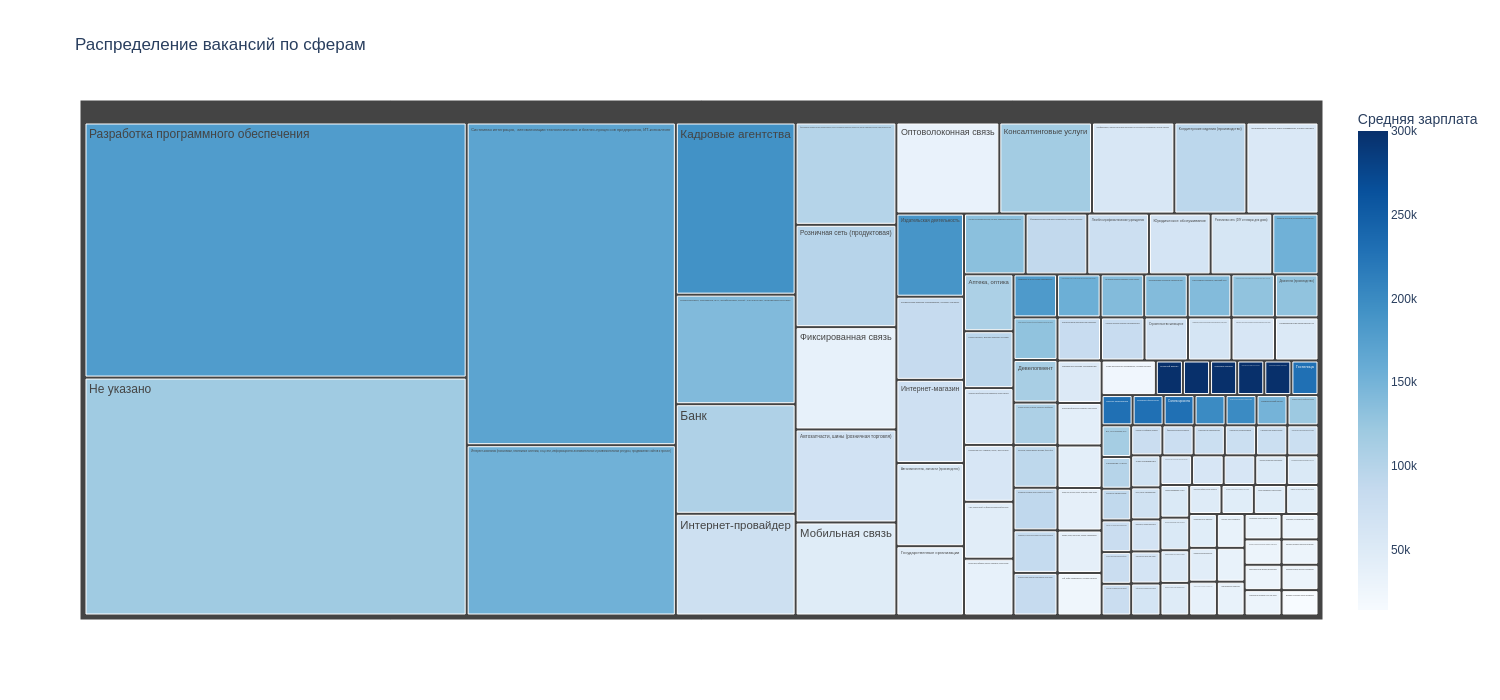

In [65]:
fig = px.treemap(
    result_01, 
    path=["industry_name"], 
    values="count_vacancies", 
    color="avg_salary", 
    color_continuous_scale="Blues",
    title="Распределение вакансий по сферам",
    labels={"industry_name": "Сфера", "count_vacancies": "Кол-во вакансий", "avg_salary": "Средняя зарплата"},
    height=700, width=1500,
)
fig.show('png')

In [66]:
#fig.write_html('plotly/Распределение вакансий по сферам.html')

In [67]:
# не забываем закрыть соединение после окончания работы
connection.close()

Как видим, работа с данными в том или ином виде требуется в самых разных отраслях.

Часто сфера не указана.

На графике можем найти самые высокооплачиваемые сферы - игорный бизнес, лизинговые компании, бытовая техника и алкогольная продукция.  Больше всего вакансий в профильных it-сферах  и консалтинговых услугах. 